SALES DATA ANALYSIS

STEP 1 - Data Exploration

In [206]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [205]:
df=pd.read_excel("data/ECOMM DATA.xlsx")

df.head()
df.info()
df.describe()
df.isnull().sum()  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [207]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


STEP 2 - Calculate Total Sales 

In [208]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Calculate total sales 
total_sales = df['Sales'].sum().round(2)
print(f"Total sales : {total_sales}")



Total sales : 12642501.91


In [182]:
#Calculate Total Sales by Year 

df['Year'] = df['Order Date'].dt.year
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# pandas display option to avoid scientific notation 
pd.options.display.float_format = '{:,.2f}'.format  # Change to 2 decimal places, using commas for thousands

print("Total Sales by Year:")
print(sales_by_year)

Total Sales by Year:
   Year        Sales
0  2011 2,259,450.90
1  2012 2,677,438.69
2  2013 3,405,746.45
3  2014 4,299,865.87


In [183]:
#Total sales by Year and Product 


df['Year'] = df['Order Date'].dt.year

# Group by 'Year' and 'Product Name' to get total sales for each combination
sales_by_year_and_product = df.groupby(['Year', 'Product Name'])['Sales'].sum().reset_index()

# Sort by 'Year' and then 'Sales' for clarity
sales_by_year_and_product = sales_by_year_and_product.sort_values(by=['Year', 'Sales'], ascending=[True, False])

print("Total Sales by Year and Product:")
print(sales_by_year_and_product)
print(sales_by_year)

Total Sales by Year and Product:
       Year                                       Product Name     Sales
787    2011  Cisco TelePresence System EX90 Videoconferenci... 22,638.48
2406   2011                          Samsung Smart Phone, VoIP 16,330.16
2008   2011                       Nokia Smart Phone, Full Size 16,265.52
782    2011                  Cisco Smart Phone, with Caller ID 15,614.53
260    2011                       Apple Smart Phone, Full Size 14,986.25
...     ...                                                ...       ...
9753   2014      Avery Hidden Tab Dividers for Binding Systems      1.79
10249  2014                       Computer Printout Index Tabs      1.68
10596  2014  Eureka Disposable Bags for Sanitaire Vibra Gro...      1.62
12188  2014                   Self-Adhesive Ring Binder Labels      1.41
11082  2014       Hoover Commercial Lightweight Upright Vacuum      1.39

[12769 rows x 3 columns]
   Year        Sales
0  2011 2,259,450.90
1  2012 2,677,438.69
2 

STEP 3 - Analyze Sales Trends Over Time

In [184]:
print(type(df['Order Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


1.Sales Trends Based on Date 

In [185]:
order_sales_sum = df.groupby('Order Date')['Sales'].sum().reset_index()
order_sales_sum.head()

,Order Date,Sales
0,2011-01-01,808.56
1,2011-01-02,314.22
2,2011-01-03,"4,503.54"
3,2011-01-04,"2,808.87"
4,2011-01-05,"3,662.31"


In [108]:
print(type(order_sales_sum["Sales"]))

<class 'pandas.core.series.Series'>


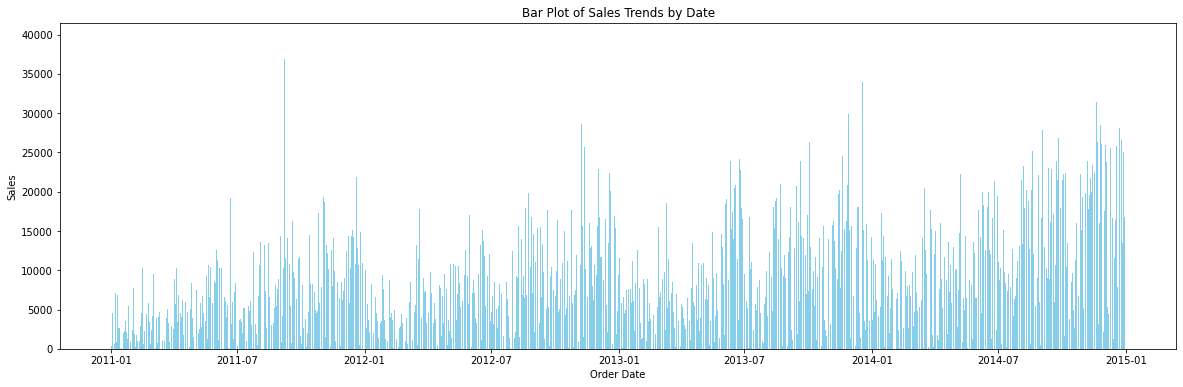

In [186]:
sales_timeline_fig = plt

sales_timeline_fig.figure(figsize=(20, 6))
sales_timeline_fig.bar(order_sales_sum['Order Date'], order_sales_sum['Sales'], color='skyblue')  # 'color' sets the bar color
sales_timeline_fig.title('Bar Plot of Sales Trends by Date')
sales_timeline_fig.xlabel('Order Date')
sales_timeline_fig.ylabel('Sales')
sales_timeline_fig.show()

2.Sales Trends Based on Year and Month

In [187]:
order_sales_sum['Year-Month'] = order_sales_sum['Order Date'].dt.to_period('M').astype(str)

# Group by 'Year-Month' and sum 'Sales'
grouped_sales = order_sales_sum.groupby('Year-Month')['Sales'].sum().reset_index()

# Sort by 'Year-Month'
grouped_sales = grouped_sales.sort_values(by='Year-Month')

In [188]:
grouped_sales.head()

,Year-Month,Sales
0,2011-01,"98,898.49"
1,2011-02,"91,152.16"
2,2011-03,"145,729.37"
3,2011-04,"116,915.76"
4,2011-05,"146,747.84"


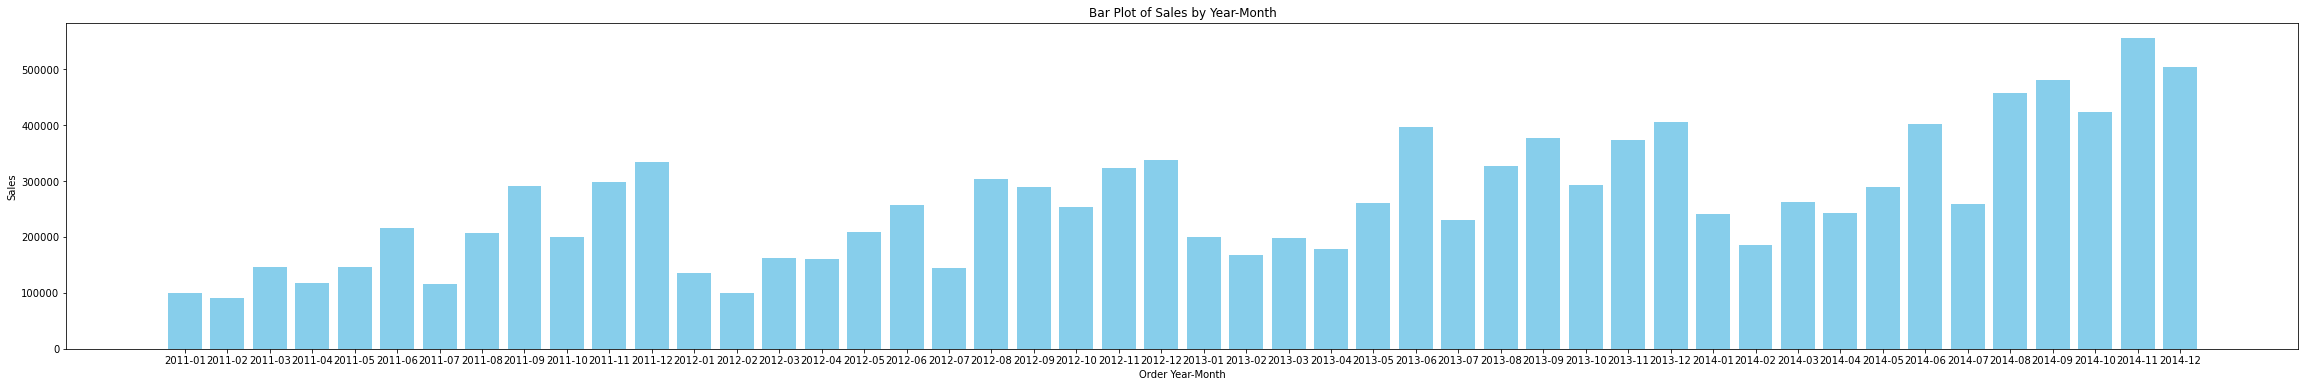

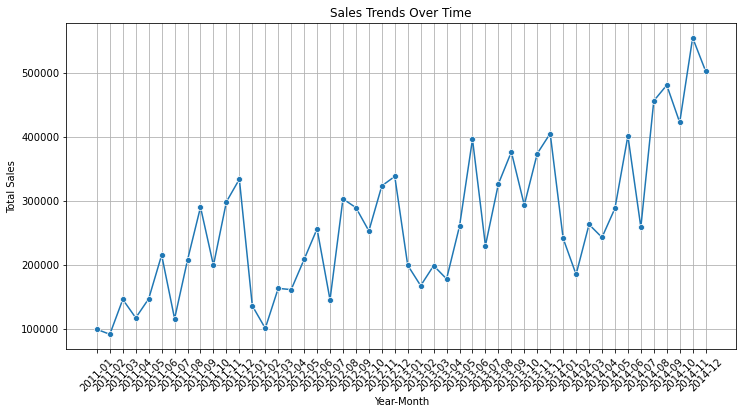

In [209]:
grouped_sales_timeline_fig = plt

grouped_sales_timeline_fig.figure(figsize=(40, 6))
grouped_sales_timeline_fig.bar(grouped_sales['Year-Month'], grouped_sales['Sales'], color='skyblue')  # 'color' sets the bar color
grouped_sales_timeline_fig.title('Bar Plot of Sales by Year-Month')
grouped_sales_timeline_fig.xlabel('Order Year-Month')
grouped_sales_timeline_fig.ylabel('Sales')
grouped_sales_timeline_fig.show()

# Create a line plot to visualize sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_sales, x='Year-Month', y='Sales', marker='o', linestyle='-')
plt.title('Sales Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

3.Sales Trends Based on Year 

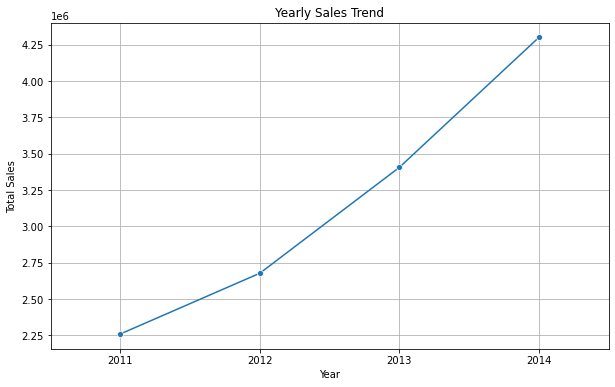

In [190]:

df['Year'] = df['Order Date'].dt.year.astype(int)  

# Group by 'Year' and sum 'Sales'
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Create a line plot for yearly sales
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Sales', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Ensure x-axis has only integer values
plt.xticks(ticks=yearly_sales['Year'])  
plt.xlim(yearly_sales['Year'].min() - 0.5, yearly_sales['Year'].max() + 0.5)  

plt.grid(True)
plt.show()

STEP 4 - Best selling Product

The best-selling product is 'Apple Smart Phone, Full Size' with total sales of 86935.78


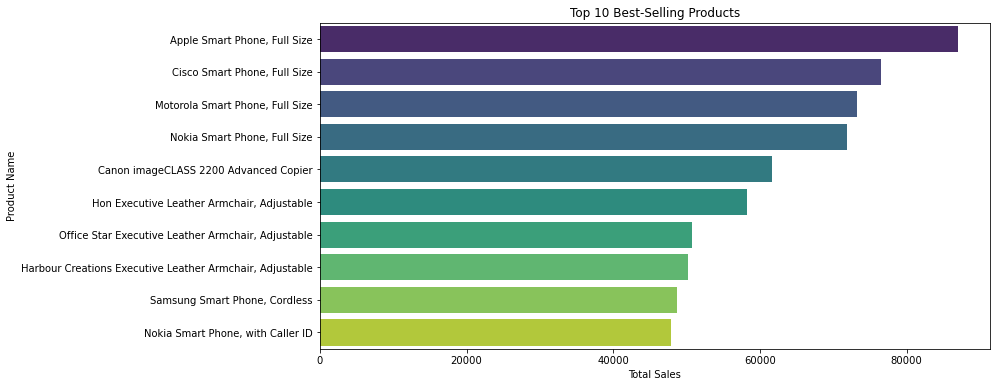

In [192]:
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index()

best_selling_products = product_sales.sort_values(by='Sales', ascending=False)

# Print the best-selling product
best_product = best_selling_products.iloc[0]['Product Name']
best_sales = best_selling_products.iloc[0]['Sales']
print(f"The best-selling product is '{best_product}' with total sales of {best_sales:.2f}")


# Bar plot for TOp 10 best-selling products
plt.figure(figsize=(12, 6))
sns.barplot(data=best_selling_products.head(10), x='Sales', y='Product Name', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

STEP 5 - Additional Revenue Indicators

1. Calculate Total Sales by Segment 


Total Profit: 1467457.29


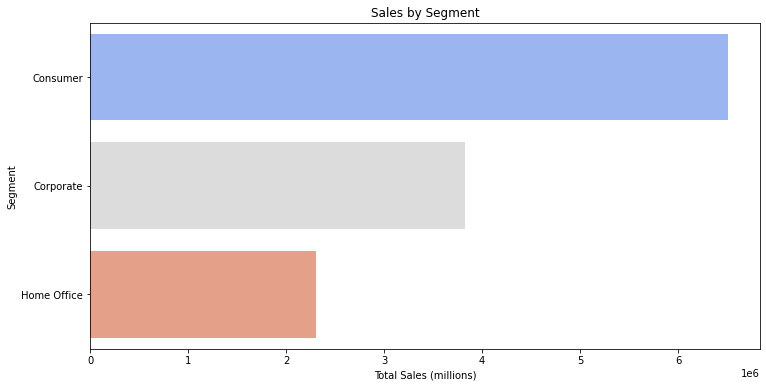

In [193]:
# Find the total profit
total_profit = df['Profit'].sum()

print(f"Total Profit: {total_profit:.2f}")

# Group by 'Segment' and sum 'Sales' to find revenue by segment
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

# Bar plot for revenue by segment
plt.figure(figsize=(12, 6))
sns.barplot(data=segment_sales, x='Sales', y='Segment', palette='coolwarm')
plt.title('Sales by Segment')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Segment')
plt.show()

2. Calculate Average Profit by Category 

Average Profit by Category:
          Category  Profit
0        Furniture   28.88
1  Office Supplies   16.58
2       Technology   65.45


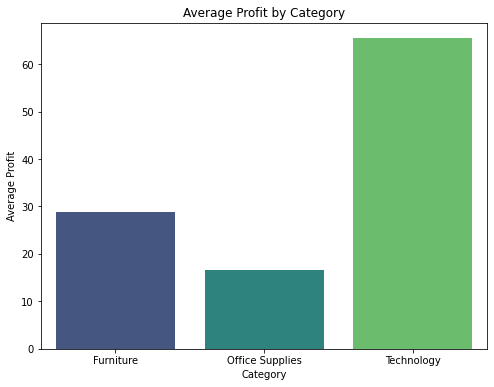

In [194]:
# Group by 'Category' and compute average profit
avg_profit_by_category = df.groupby('Category')['Profit'].mean().reset_index()

print("Average Profit by Category:")
print(avg_profit_by_category)

# Bar plot to visualize average profit by category
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_profit_by_category, x='Category', y='Profit', palette='viridis')  # Using 'viridis' color palette
plt.title('Average Profit by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit')
plt.show()

3. Top Customers - Identify the customers with the highest total sales, helping you focus on key accounts.


In [195]:
# Group by 'Customer Name' and sum 'Sales' to find top customers
top_customers = df.groupby('Customer Name')['Sales'].sum().reset_index()
top_customers = top_customers.sort_values(by='Sales', ascending=False)

print("Top Customers:")
print(top_customers.head(10))  

Top Customers:
          Customer Name     Sales
758        Tom Ashbrook 40,488.07
731        Tamara Chand 37,457.33
313           Greg Tran 35,550.95
157  Christopher Conant 35,187.08
687         Sean Miller 35,170.93
73         Bart Watters 32,310.45
558    Natalie Fritzler 31,781.26
290        Fred Hopkins 30,400.67
347           Jane Waco 30,288.45
335        Hunter Lopez 30,243.57


4. Sales by State or City - This can help identify high-performing areas or potential markets for expansion. 

In [196]:
# Group by 'State' and sum 'Sales'
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()
sales_by_state = sales_by_state.sort_values(by='Sales', ascending=False)

print("Sales by State:")
print(sales_by_state)

Sales by State:
                  State      Sales
311             England 485,170.97
192          California 457,687.63
435       Ile-de-France 317,822.54
703            New York 310,876.27
702     New South Wales 270,487.10
..                  ...        ...
781              Pernik      14.82
603          Manicaland      11.85
155              Bitola      10.98
473            Kabarole       3.57
628  Matabeleland North       3.46

[1094 rows x 2 columns]


5. Order Analysis - Understanding order details can reveal trends related to order volume, priorities, or shipping.

Order Volume Over Time:
   Year-Month  Order ID
0     2011-01       216
1     2011-02       183
2     2011-03       277
3     2011-04       267
4     2011-05       295
5     2011-06       468
6     2011-07       250
7     2011-08       443
8     2011-09       527
9     2011-10       401
10    2011-11       563
11    2011-12       620
12    2012-01       260
13    2012-02       230
14    2012-03       337
15    2012-04       322
16    2012-05       413
17    2012-06       571
18    2012-07       324
19    2012-08       522
20    2012-09       641
21    2012-10       499
22    2012-11       716
23    2012-12       628
24    2013-01       345
25    2013-02       306
26    2013-03       411
27    2013-04       394
28    2013-05       522
29    2013-06       724
30    2013-07       447
31    2013-08       692
32    2013-09       836
33    2013-10       580
34    2013-11       789
35    2013-12       825
36    2014-01       450
37    2014-02       385
38    2014-03       530
39    2014-04   

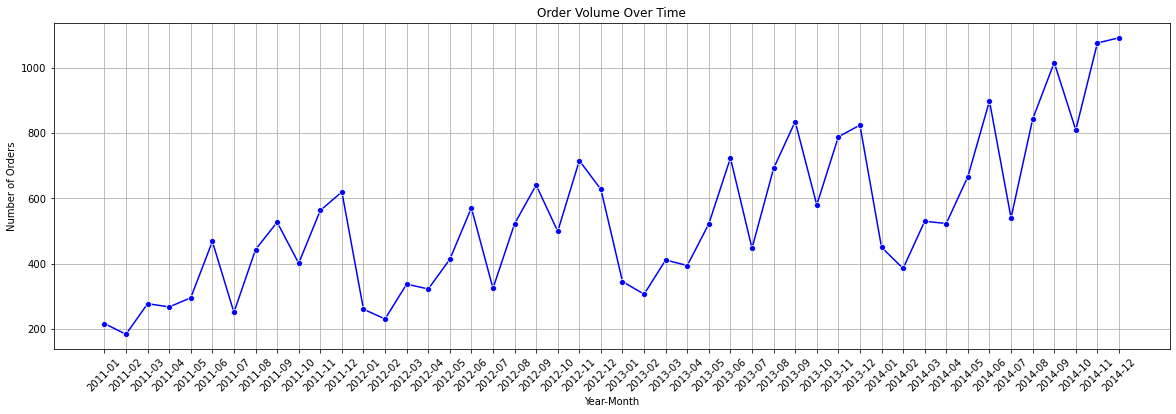

In [197]:

df['Year-Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Group by 'Year-Month' and count orders
order_volume = df.groupby('Year-Month')['Order ID'].nunique().reset_index()

print("Order Volume Over Time:")
print(order_volume)

# Visualize order volume over time
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.lineplot(data=order_volume, x='Year-Month', y='Order ID', marker='o', linestyle='-', color='b')
plt.title('Order Volume Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


6. Apriori Algorithm - The Apriori algorithm is a powerful tool for uncovering hidden patterns and relationships in transactional data, enabling businesses to make data-driven decisions and improve their operations and customer experiences

In [198]:
if df.empty:
    print("The DataFrame is empty. Ensure data is correctly loaded.")
else:
    
    print("DataFrame Columns:", df.columns)
    print("First few rows of the DataFrame:")
    print(df.head())

DataFrame Columns: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Year', 'Year-Month'],
      dtype='object')
First few rows of the DataFrame:
   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen   

In [199]:
transactions = df.groupby('Order ID')['Product Name'].apply(list)
transactions.head()

Order ID
AE-2011-9160    [Fellowes File Cart, Industrial, Epson Calcula...
AE-2013-1130    [Bush Stackable Bookrack, Pine, Accos Paper Cl...
AE-2013-1530    [Tenex Folders, Blue, Stiletto Letter Opener, ...
AE-2014-2840                       [Rogers File Cart, Industrial]
AE-2014-3830    [Motorola Headset, VoIP, Eldon Lockers, Blue, ...
Name: Product Name, dtype: object

In [200]:
# Ensure 'Order ID' and 'Product Name' columns exist
if 'Order ID' not in df.columns or 'Product Name' not in df.columns:
    print("Missing required columns 'Order ID' or 'Product Name'.")
else:
    # Group by 'Order ID' to create a list of products for each order
    transactions = df.groupby('Order ID')['Product Name'].apply(list)
    print("Transactions:")
    print(transactions)

Transactions:
Order ID
AE-2011-9160    [Fellowes File Cart, Industrial, Epson Calcula...
AE-2013-1130    [Bush Stackable Bookrack, Pine, Accos Paper Cl...
AE-2013-1530    [Tenex Folders, Blue, Stiletto Letter Opener, ...
AE-2014-2840                       [Rogers File Cart, Industrial]
AE-2014-3830    [Motorola Headset, VoIP, Eldon Lockers, Blue, ...
                                      ...                        
ZI-2014-7160    [Rogers Shelving, Blue, Tenex Shelving, Indust...
ZI-2014-7610    [StarTech Phone, Red, Advantus Thumb Tacks, Bu...
ZI-2014-9540                          [Binney & Smith Pens, Blue]
ZI-2014-9550    [Konica Receipt Printer, Red, Avery Hole Reinf...
ZI-2014-9650           [Avery Color Coded Labels, 5000 Label Set]
Name: Product Name, Length: 25035, dtype: object


In [201]:
# Check for missing values in 'Order ID' and 'Product Name'
missing_order_ids = df['Order ID'].isna().sum()
missing_product_names = df['Product Name'].isna().sum()

print("Missing 'Order ID':", missing_order_ids)
print("Missing 'Product Name':", missing_product_names)

Missing 'Order ID': 0
Missing 'Product Name': 0


In [202]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the transactions into a one-hot encoded format
te = TransactionEncoder()
one_hot_encoded = te.fit(transactions).transform(transactions)

In [210]:
# Convert the one-hot encoded array into a DataFrame
df_encoded = pd.DataFrame(one_hot_encoded, columns=te.columns_)

# Apply the Apriori algorithm to find frequent item sets
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)

In [176]:
print"There are no frequent item sets found. The Apriori algorithm cannot be applied to find frequently bought item sets.")
print(frequent_itemsets)

There are no frequent item sets found. The Apriori algorithm cannot be applied to find frequently bought item sets.
     support                            itemsets
0       0.00          (Acco 3-Hole Punch, Clear)
1       0.00        (Acco 3-Hole Punch, Durable)
2       0.00        (Acco 3-Hole Punch, Economy)
3       0.00       (Acco 3-Hole Punch, Recycled)
4       0.00         (Acco Binder Covers, Clear)
..       ...                                 ...
502     0.00     (Wilson Jones Index Tab, Clear)
503     0.00   (Wilson Jones Index Tab, Durable)
504     0.00   (Wilson Jones Index Tab, Economy)
505     0.00  (Wilson Jones Index Tab, Recycled)
506     0.00        (Xerox Memo Slips, 8.5 x 11)

[507 rows x 2 columns]
